**Name:** Omid Davoudnia  
**Student ID:** 400205544  
**University:** Sharif University of Technology  
**Program:** [Test PCA and dimesnsion reduced LDA on IRIS and ORL datasets] 
**Date:** [1402/09]   

**Libraries**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import os
import cv2

**Functions**

In [11]:
def myPCA(X, num_components):
    # Normalize the data
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_normalized, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors in descending order based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the principal components
    principal_components = sorted_eigenvectors[:, :num_components]

    # Transpose the result to match scikit-learn's PCA format
    transformed_data = np.dot(X_normalized, principal_components)

    # Multiply by -1 to match direction of scikit-learn's PCA
    transformed_data[:, 0] *= -1

    return transformed_data
    

**Load dataset**

In [12]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

**Do PCA!**

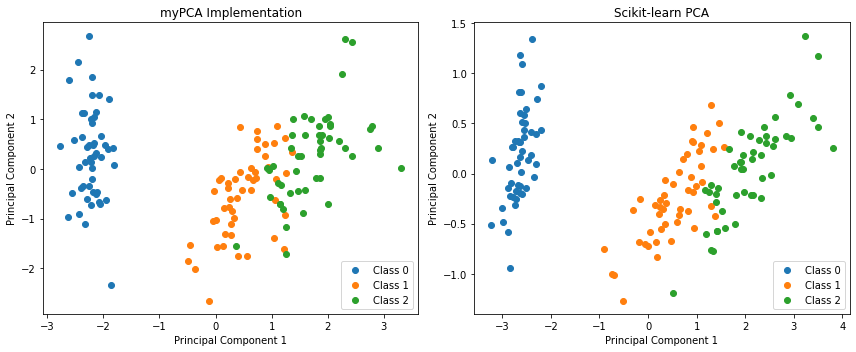

In [13]:
# Apply PCA function
num_components_myPCA = 2
transformed_data_myPCA = myPCA(X, num_components_myPCA)

# Apply scikit-learn's PCA
num_components_sklearn = 2
pca = PCA(n_components=num_components_sklearn)
transformed_data_sklearn = pca.fit_transform(X)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot using myPCA
axes[0].scatter(transformed_data_myPCA[y == 0, 0], transformed_data_myPCA[y == 0, 1], label='Class 0')
axes[0].scatter(transformed_data_myPCA[y == 1, 0], transformed_data_myPCA[y == 1, 1], label='Class 1')
axes[0].scatter(transformed_data_myPCA[y == 2, 0], transformed_data_myPCA[y == 2, 1], label='Class 2')
axes[0].set_title('myPCA Implementation')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()

# Plot using scikit-learn's PCA
axes[1].scatter(transformed_data_sklearn[y == 0, 0], transformed_data_sklearn[y == 0, 1], label='Class 0')
axes[1].scatter(transformed_data_sklearn[y == 1, 0], transformed_data_sklearn[y == 1, 1], label='Class 1')
axes[1].scatter(transformed_data_sklearn[y == 2, 0], transformed_data_sklearn[y == 2, 1], label='Class 2')
axes[1].set_title('Scikit-learn PCA')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()

plt.tight_layout()
plt.show()

# Eigenfaces and Principal Component Analysis (PCA)

## Eigenfaces:

Eigenfaces are a set of eigenvectors derived from the covariance matrix of face image data. These eigenvectors capture the most significant variations present in a dataset of face images. Each eigenface corresponds to an eigenvector of the covariance matrix, representing a direction of maximum variance in the dataset.

## Principal Component Analysis (PCA):

Principal Component Analysis is a dimensionality reduction technique commonly used in image processing and facial recognition. It transforms the original data into a new coordinate system, where the first few principal components (in the case of facial images, these are the eigenfaces) retain the most information about the data. Principal components are ranked based on the amount of variance they capture.

## Process:

1. **Data Collection:** Gather a dataset of face images.
2. **Preprocessing:** Normalize and standardize the images to reduce variations.
3. **Covariance Matrix:** Compute the covariance matrix of the standardized face dataset.
4. **Eigendecomposition:** Perform eigendecomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
5. **Principal Components:** The eigenvectors, or eigenfaces, represent the principal components of the face images.
6. **Dimensionality Reduction:** Choose the top-k eigenfaces corresponding to the largest eigenvalues to reduce the dimensionality of the data.
7. **Face Reconstruction:** Faces can be reconstructed using a linear combination of the selected eigenfaces.
8. **Recognition:** In facial recognition tasks, classify faces based on the reduced-dimensional representation.

Eigenfaces and PCA have proven effective in facial recognition systems. They enable a robust representation of facial features and dimensionality reduction, allowing for efficient storage and comparison of face images.

Lets dive into Experiment :)


**Read ORL RAW Dataset**

In [14]:
# Path to the directory containing ORL dataset
dataset_path = 'ORL\\'  # Use double backslashes on Windows

# Initialize lists to store training and test data
train_images = []
train_labels = []
test_images = []
test_labels = []

# Iterate through each subdirectory (person) in the dataset path
for person_id in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person_id)
    
    # Check if the item in the directory is a subdirectory
    if os.path.isdir(person_path):
        # Extract the numeric part of the person ID
        numeric_person_id = int(person_id[1:])
        
        # Iterate through the first 5 images in the subdirectory for training
        for filename in os.listdir(person_path)[:5]:
            img_path = os.path.join(person_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            train_images.append(img)
            train_labels.append(numeric_person_id)
        
        # Iterate through the last 5 images in the subdirectory for testing
        for filename in os.listdir(person_path)[-5:]:
            img_path = os.path.join(person_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            test_images.append(img)
            test_labels.append(numeric_person_id)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Print information about the datasets
print("Shape of the training images array:", train_images.shape)
print("Shape of the training labels array:", train_labels.shape)
print("Shape of the test images array:", test_images.shape)
print("Shape of the test labels array:", test_labels.shape)


Shape of the training images array: (200, 48, 48)
Shape of the training labels array: (200,)
Shape of the test images array: (200, 48, 48)
Shape of the test labels array: (200,)


**See what we read!!**

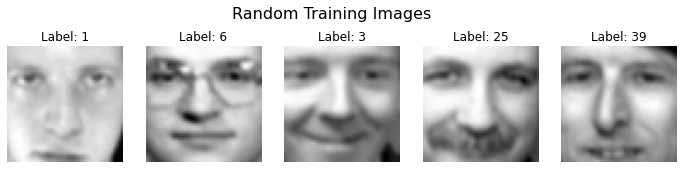

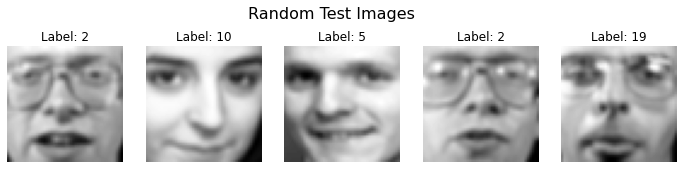

In [15]:
import matplotlib.pyplot as plt
import random

# Function to display random images
def display_random_images(images, labels, title):
    plt.figure(figsize=(12, 5))
    plt.suptitle(title, fontsize=16)

    for i in range(5):
        plt.subplot(2, 5, i + 1)
        index = random.randint(0, len(images) - 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')

# Display random images from the training set
display_random_images(train_images, train_labels, title='Random Training Images')

# Display random images from the test set
display_random_images(test_images, test_labels, title='Random Test Images')

plt.show()

**Flatten data to work with**

In [16]:
# Flatten the images
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

# Flatten the images
flat_train_images = flatten_images(train_images)
flat_test_images = flatten_images(test_images)

# Print information about the flattened arrays
print("Shape of the flattened training images array:", flat_train_images.shape)
print("Shape of the flattened test images array:", flat_test_images.shape)


Shape of the flattened training images array: (200, 2304)
Shape of the flattened test images array: (200, 2304)


**Do PCA on flattend Data**

In [26]:
# Define the number of components for PCA
n_components_pca = 50

# Instantiate PCA with the desired number of components
sklearn_pca = PCA(n_components=n_components_pca)

# Train PCA on the flattened training images
pca_train_result = sklearn_pca.fit_transform(flat_train_images)

# Transform the flattened test images using PCA
pca_test_result = sklearn_pca.transform(flat_test_images)


# Print the shape of the reduced dataset
print("Shape of the reduced Train dataset:", pca_train_result.shape)
print("Shape of the reduced Test  dataset:", pca_test_result.shape)


Shape of the reduced Train dataset: (200, 50)
Shape of the reduced Test  dataset: (200, 50)


**Say Hi to Top eigenfaces**

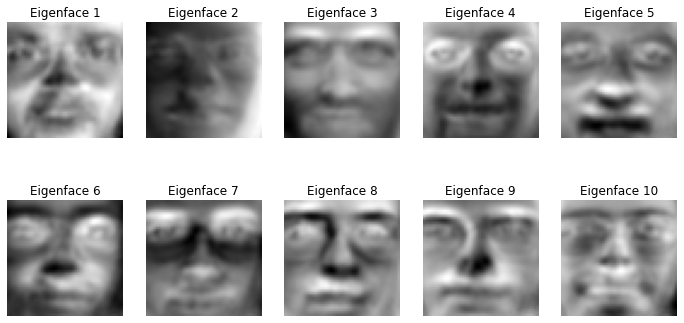

In [27]:
# Assuming train_images is a NumPy array
original_image_shape = train_images.shape[1:]

# Reshape the components to the original image shape
eigenfaces = sklearn_pca.components_.reshape((n_components_pca, *original_image_shape))

# Plot the top 10 eigenfaces with larger size
num_eigenfaces_to_display = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f'Eigenface {i + 1}')
    ax.axis('off')

plt.show()

**Self impleamented LDA AS instructed**

In [28]:
from sklearn.metrics import accuracy_score

class Classifier:
    def predict(self, x_test):
        raise NotImplementedError("Predict method must be implemented in subclasses.")

    def score(self, y_test):
        raise NotImplementedError("Score method must be implemented in subclasses.")

    def train(self, X_train, y_train):
        pass


class LDA(Classifier):
    def __init__(self):
        super().__init__()
        self.class_means = None
        self.covariance_matrix = None

    def train(self, X_train, y_train):
        unique_classes = np.unique(y_train)
        class_means = []

        for label in unique_classes:
            class_means.append(np.mean(X_train[y_train == label], axis=0))

        self.class_means = np.array(class_means)
        self.covariance_matrix = np.cov(X_train, rowvar=False)

    def predict(self, x_test):
        predictions = []

        for sample in x_test:
            distances = [np.dot(np.dot((sample - mean).T, np.linalg.inv(self.covariance_matrix)), (sample - mean))
                         for mean in self.class_means]

            predicted_class = np.argmin(distances)
            predictions.append(predicted_class)

        return np.array(predictions)

    def score(self, y_test, predictions):
        accuracy = accuracy_score(y_test, predictions)
        return accuracy


**Lets evaluate our dimesion Reduced LDA**

In [29]:
# Instantiate custom LDA classifier
lda_classifier = LDA()

# Train the LDA classifier on the PCA-transformed training data
lda_classifier.train(pca_train_result, train_labels)

# Predict labels for the PCA-transformed test data
lda_predictions = lda_classifier.predict(pca_test_result)

# Adjust predicted labels by adding 1
lda_predictions_adjusted = lda_predictions + 1

# Calculate accuracy
accuracy = lda_classifier.score(test_labels, lda_predictions_adjusted)

print("Accuracy of Dimension Reduced LDA:%", accuracy * 100)


Accuracy of Dimension Reduced LDA:% 86.0


**Visualize statistics**

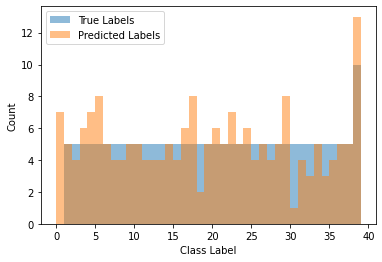

In [30]:
unique_labels, counts = np.unique(lda_predictions, return_counts=True)

# Plot histogram for true labels
plt.hist(test_labels, bins=np.arange(40), alpha=0.5, label='True Labels')

# Plot histogram for predicted labels
plt.hist(lda_predictions, bins=np.arange(40), alpha=0.5, label='Predicted Labels')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.legend()
plt.show()

**Find best n_components_pca**

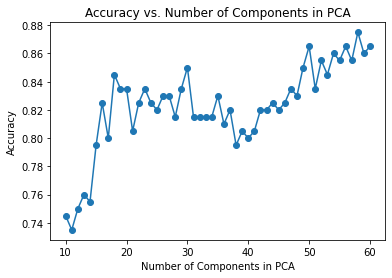

Best n_components_pca: 58


In [31]:
# Define a range of n_components_pca values to sweep
n_components_pca_values = range(10, 61)

# Initialize lists to store accuracy values for different n_components_pca
accuracy_values = []

# Sweep n_components_pca values
for n_components_pca in n_components_pca_values:
    # Instantiate PCA with the current number of components
    sklearn_pca = PCA(n_components=n_components_pca)

    # Train PCA on the flattened training images
    pca_train_result = sklearn_pca.fit_transform(flat_train_images)

    # Transform the flattened test images using PCA
    pca_test_result = sklearn_pca.transform(flat_test_images)

    # Instantiate custom LDA classifier
    lda_classifier = LDA()

    # Train the LDA classifier on the PCA-transformed training data
    lda_classifier.train(pca_train_result, train_labels)

    # Predict labels for the PCA-transformed test data
    lda_predictions = lda_classifier.predict(pca_test_result)

    # Adjust predicted labels by adding 1
    lda_predictions_adjusted = lda_predictions + 1

    # Calculate accuracy
    accuracy = lda_classifier.score(test_labels, lda_predictions_adjusted)

    # Store accuracy value
    accuracy_values.append(accuracy)

# Plot the accuracy values for different n_components_pca
plt.plot(n_components_pca_values, accuracy_values, marker='o')
plt.xlabel('Number of Components in PCA')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components in PCA')
plt.show()

# Find the best n_components_pca based on the maximum accuracy
best_n_components_pca = n_components_pca_values[np.argmax(accuracy_values)]
print("Best n_components_pca:", best_n_components_pca)

# PCA-LDA Analysis Summary

## Overall Accuracy Trend
- The accuracy increases initially, reaching a peak around 20-25 PCA dimensions.
- After the peak, the accuracy tends to stabilize and fluctuate around a relatively high value.
- The highest accuracy achieved is 86% with 45 PCA dimensions.

## Impact of PCA Dimensionality
- The results suggest that a moderate number of PCA dimensions (around 20-25) provides good discriminatory power for the given dataset.
- Beyond a certain point, increasing the number of PCA dimensions does not significantly improve accuracy, and there may be a risk of overfitting.

## Characteristics of PCA-LDA Approach
- PCA is effective in reducing the dimensionality of the data while retaining most of the relevant information.
- The subsequent application of LDA on the reduced PCA dimensions helps maximize class separability.
- The combination of PCA and LDA is a common approach for dimensionality reduction and classification tasks.

## Optimal Number of PCA Dimensions
- The analysis suggests that an optimal number of PCA dimensions lies in the range of 20-25 for the given dataset.
- Choosing an appropriate number of PCA dimensions is crucial to balance model complexity and performance.

## Considerations for Model Selection
- The choice of the optimal number of PCA dimensions should be based on a trade-off between computational efficiency and model accuracy.
- It's important to evaluate the results in the context of the specific requirements of application.

## Future Work and Optimization
- Further experimentation could explore variations in the PCA-LDA approach, such as adjusting hyperparameters or incorporating other dimensionality reduction techniques.
- Cross-validation and more extensive hyperparameter tuning could be performed to enhance the robustness of the model.

## Conclusion
- The PCA-LDA approach shows promise for the given dataset, providing high accuracy with a moderate number of PCA dimensions.
- The optimal number of PCA dimensions may vary based on the characteristics of the dataset, and fine-tuning the approach is recommended.


## Stopping Dimension Reduction in PCA

Determining the optimal number of components (features) for PCA involves finding a balance between dimensionality reduction and maintaining sufficient information to accurately represent the data. Here are a few common approaches to deciding when to stop dimension reduction by PCA:

1. **Elbow Method:**
   - Plot the accuracy scores against the number of components.
   - Look for an "elbow" point where adding more components does not significantly improve accuracy.
   - This is the point where the marginal gain in accuracy starts to decrease.

2. **Cumulative Explained Variance:**
   - Plot the cumulative explained variance ratio against the number of components.
   - Choose the number of components that captures a sufficiently high percentage of the variance (e.g., 95% or 99%).
   - The cumulative explained variance can be obtained using `np.cumsum(pca.explained_variance_ratio_)`.

3. **Cross-Validation:**
   - Perform cross-validation with different numbers of components and select the number that gives the best average performance.
   - This helps ensure that the model's performance is generalized to unseen data.

4. **Application-Specific Considerations:**
   - Consider the specific requirements of your application. Sometimes a slightly higher dimensionality may be acceptable if it significantly improves accuracy.

